# 0. Import Library

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

import pandas as pd
import seaborn as sns

![](https://onlinelibrary.wiley.com/cms/asset/ea1d3bd8-afd7-4914-b645-74d424b6690d/advs3654-fig-0002-m.jpg)

# 1. Input Data

In [ ]:
df = pd.read_csv('gdp2c.csv')

# 2. Data Preprocessing

## 2.1 Exploratory Data Analysis (EDA)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.dtypes

## 2.2 Data Cleaning

### - Missing Value

In [ ]:
df.isnull().sum()

### - Outlier

### Feature: SGP

In [ ]:
q3 = df.SGP.quantile(.75)
q1 = df.SGP.quantile(.25)

iqr = q3 - q1

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
print('Lower: {:.2f} \nUpper: {:.2f}' . format(lower, upper))

plt.axvline(x=q1, c='b', linestyle='--', linewidth=1)
plt.axvline(x=q3, c='g', linestyle='--', linewidth=1)
plt.axvline(x=lower, c='r', linestyle='--')
plt.axvline(x=upper, c='r', linestyle='--')
sns.boxplot(x=df.SGP, width=0.4, palette='Set2')
plt.show()

### Target: VNM

In [ ]:
q3 = df.VNM.quantile(.75)
q1 = df.VNM.quantile(.25)

iqr = q3 - q1

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
print('Lower: {:.2f} \nUpper: {:.2f}' . format(lower, upper))

plt.axvline(x=q1, c='b', linestyle='--', linewidth=1)
plt.axvline(x=q3, c='g', linestyle='--', linewidth=1)
plt.axvline(x=lower, c='r', linestyle='--')
plt.axvline(x=upper, c='r', linestyle='--')
sns.boxplot(x=df.VNM, width=0.4, palette='Set2')
plt.show()

### [Optional] Export เป็นไฟล์เมื่อทำ Data Cleaning เสร็จแล้ว

In [ ]:
#df.to_csv('รหัสนักศึกษา.csv',index=False)
#df.to_excel('รหัสนักศึกษา.xlsx',index=False)

## 2.3 ตรวจสอบค่าสหสัมพันธ์ของตัวแปร x, y

In [ ]:
df.corr()

In [ ]:
plt.rcParams['figure.figsize'] = 10,7 
sns.set(font_scale=2.5)
sns.heatmap(df.corr(), annot=True);

## 2.4 การกำหนด Feature / Target

In [ ]:
x = df.SGP.values
y = df.VNM.values

In [ ]:
plt.scatter(x, y)
plt.show()

## 2.5 Data Preapration

In [ ]:
X = df.SGP.values.reshape(-1,1)
Y = df.VNM.values.reshape(-1,1)

## 2.6 แปลงข้อมูลให้อยู่ในรูป Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)

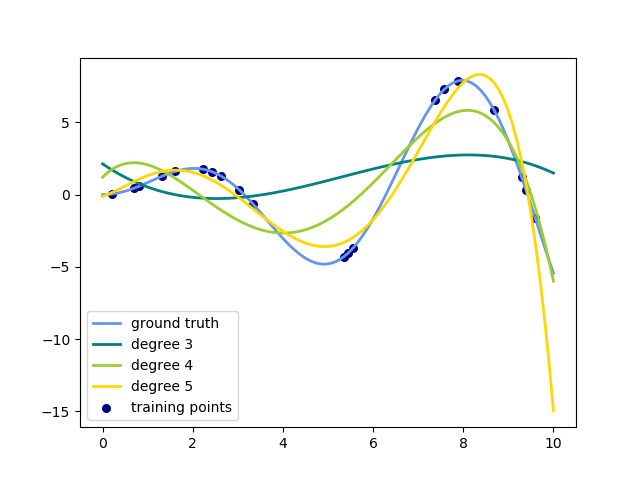

In [ ]:
X_Poly = poly_features.fit_transform(X)

# 3. Modelling: Polynomial Regression

## 3.1 Training Data

In [ ]:
model = LinearRegression()
model.fit(X_Poly, Y)

In [ ]:
model.coef_ , model.intercept_

In [ ]:
model.score(X_Poly, Y)

## 3.2 Predict Data

In [ ]:
y_predict = model.predict(X_Poly)

# 4. Model Evaluation

In [ ]:
print("r2 Score = ",r2_score(Y, y_predict))
print("MSE = ",mean_squared_error(Y ,y_predict))
print("MAE = ",mean_absolute_error(Y, y_predict))

In [ ]:
print("MAPE = ",mean_absolute_percentage_error(Y, y_predict))

In [ ]:
plt.rcParams['figure.figsize'] = 10,6 
plt.grid()
plt.scatter(x, y, color='b')  
plt.plot(x, y_predict, linewidth='1')  
plt.scatter(x, y_predict, color='r', marker='s')

plt.show()

# [Optional] Save Machine Learning Models

In [ ]:
#import joblib
#filename = 'joblib_รหัสนศ.sav'
#joblib.dump(model, filename)

In [ ]:
#import pickle
#filename = 'pickle_รหัสนศ.sav'
#pickle.dump(model, open(filename, 'wb'))